In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./data/weight-height.csv")
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473


In [4]:
X = df.Height.values # input, data
y_true = df.Weight.values #output, labels, Asnwers

print(X[:5], y_true[:5], sep='\n\n')

[73.84701702 68.78190405 74.11010539 71.7309784  69.88179586]

[241.89356318 162.31047252 212.74085556 220.0424703  206.34980062]


In [7]:
#line Equation
def line(x, w=0, b=0):
    return x * w + b

#Cost Functions
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred) ** 2
    return np.sqrt(s.mean())

Text(0.5, 0, 'b')

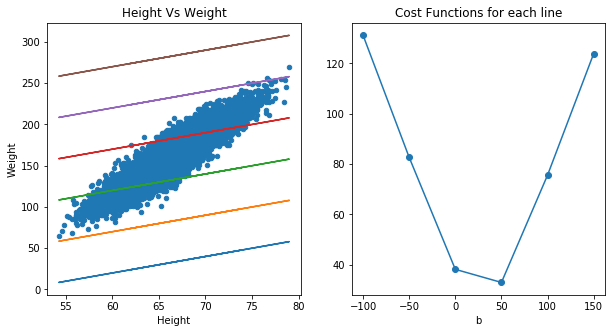

In [13]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121) # rows,columns, select column 121
df.plot(kind='scatter',
       x="Height",
       y="Weight",
       title="Height Vs Weight", ax=ax1)


bs = [-100, -50, 0, 50, 100, 150]

mses = []
for b in bs:
    y_pred = line(X, w=2, b=b) # predict line
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred) 
    
    
ax2 = plt.subplot(122)    
plt.plot(bs, mses, 'o-')
plt.title("Cost Functions for each line")
plt.xlabel("b")

In [39]:
print(bs)
print(mses)

[-100, -50, 0, 50, 100, 150]
[131.1417931672291, 82.62957208407575, 38.17227332081024, 32.96359686320369, 75.60472859445356, 123.87716195296917]


#### We have gotten b,w values after runing deep learning algoritham

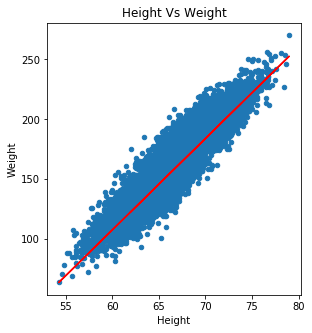

In [38]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121) # rows,columns, select column 121
df.plot(kind='scatter',
       x="Height",
       y="Weight",
       title="Height Vs Weight", ax=ax1)




y_pred = line(X, w=7.624642, b=-349.7231) # predict line [[7.624642]] [-349.7231]
plt.plot(X, y_pred, color='red') 


# Try to find w and b (weights) with Deep Learning

In [16]:
from tensorflow.keras.models import Sequential #sequential, Functional API
from tensorflow.keras.layers import Dense #each nodes connected with others nodes
from tensorflow.keras.optimizers import Adam, SGD

In [18]:
import tensorflow
tensorflow.__version__
#pip install tensorflow

'2.2.0'

In [19]:
print(X[:2],
     y_pred[:2], sep="\n")

[73.84701702 68.78190405]
[297.69403404 287.56380809]


In [20]:
X.shape

(10000,)

In [23]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [28]:
model.fit(X, y_true, epochs=45)

Epoch 1/45
313/313 [==============================] - 1s 2ms/step - loss: 859.4172
Epoch 2/45
313/313 [==============================] - 1s 2ms/step - loss: 541.8772
Epoch 3/45
313/313 [==============================] - 1s 2ms/step - loss: 498.1780
Epoch 4/45
313/313 [==============================] - 1s 2ms/step - loss: 469.9449
Epoch 5/45
313/313 [==============================] - 1s 2ms/step - loss: 432.1442
Epoch 6/45
313/313 [==============================] - 1s 2ms/step - loss: 383.1408
Epoch 7/45
313/313 [==============================] - 1s 2ms/step - loss: 341.7337
Epoch 8/45
313/313 [==============================] - 1s 2ms/step - loss: 309.4890
Epoch 9/45
313/313 [==============================] - 1s 2ms/step - loss: 287.3348
Epoch 10/45
313/313 [==============================] - 1s 2ms/step - loss: 261.0821
Epoch 11/45
313/313 [==============================] - 1s 2ms/step - loss: 252.0189
Epoch 12/45
313/313 [==============================] - 1s 2ms/step - loss: 228.6158
E

In [29]:
y_pred_deep_learning = model.predict(X)
y_pred_deep_learning

array([[213.33395],
       [174.71426],
       [215.33994],
       ...,
       [137.24747],
       [176.63828],
       [122.57956]], dtype=float32)

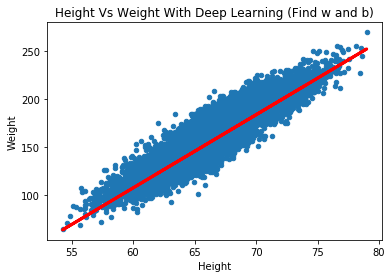

In [30]:
df.plot(kind='scatter',
       x='Height',
       y="Weight",
       title="Height Vs Weight With Deep Learning (Find w and b)")
plt.plot(X, y_pred_deep_learning, color='red', linewidth=3)

In [31]:
w, b = model.get_weights()
print(w, b)

[[7.624642]] [-349.7231]


In [32]:
model.predict([[200]])

array([[1175.2052]], dtype=float32)

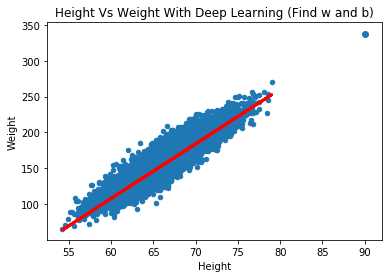

In [35]:
df.plot(kind='scatter',
       x='Height',
       y="Weight",
       title="Height Vs Weight With Deep Learning (Find w and b)")
plt.plot(X, y_pred_deep_learning, color='red', linewidth=3)
i = 90
plt.scatter(i, model.predict([[i]]))

In [44]:
df1 = pd.read_csv("https://raw.githubusercontent.com/EnggQasim/UIT/master/Deep_Learning/Chapter1/data/weight-height.csv", encoding='utf-8', error_bad_lines=False)
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
